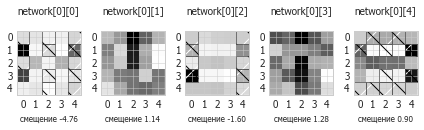

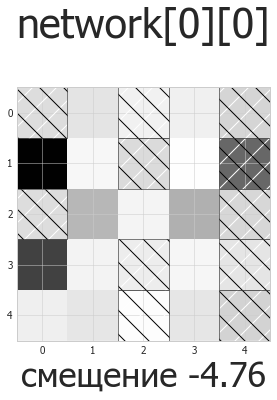

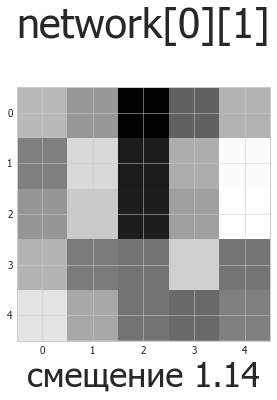

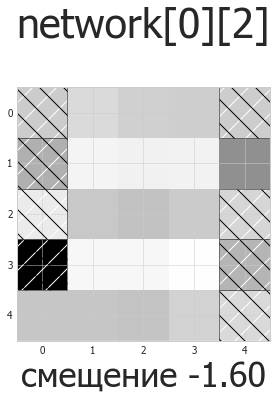

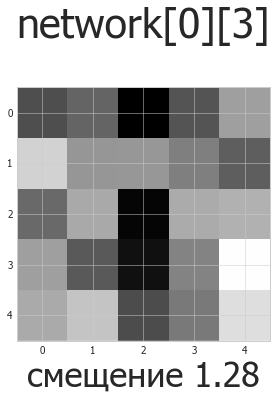

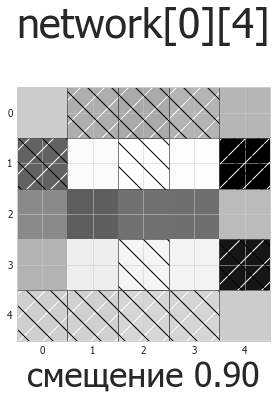

In [32]:
# -*- coding: utf-8 -*-
"""
Глава 18, рис. 4
"""

import sys
sys.path.append("../../code-python3-ru")

import numpy as np

from lib.linear_algebra import dot
import math, random

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline  

mpl.style.use('ggplot')  
mpl.style.use('seaborn-whitegrid')  
mpl.rcParams['axes.facecolor'] = u'fefefe'
#mpl.rcParams.update({'font.family': 'Ubuntu Condensed'})   
mpl.rcParams.update({'font.family': 'Tahoma'})

def round_to_1(x):
    return round(x, -int(math.floor(math.log10(x))))

def step_function(x):
    return 1 if x >= 0 else 0

def perceptron_output(weights, bias, x):
    """возвращает 1, если перцептрон 'активизируется', и 0, если нет"""
    return step_function(dot(weights, x) + bias)

def sigmoid(t):
    return 1 / (1 + math.exp(-t))

def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))

def feed_forward(neural_network, input_vector):
    """принимает нейронную сеть (как список списков списков весов) и
    вектор входящих сигналов;
    возвращает результат прямого распространения входящих сигналов"""

    outputs = []

    for layer in neural_network:

        input_with_bias = input_vector + [1]             # добавить величину смещения
        output = [neuron_output(neuron, input_with_bias) # вычислить результат
                  for neuron in layer]                   # для этого нейрона
        outputs.append(output)                           # и запомнить его

        # входом для следующего слоя становится
        # вектор результатов текущего слоя
        input_vector = output

    return outputs

def backpropagate(network, input_vector, target):

    hidden_outputs, outputs = feed_forward(network, input_vector)

    # из производной сигмоидальной функции взято output * (1 - output)
    output_deltas = [output * (1 - output) * (output - target[i])
                     for i, output in enumerate(outputs)]

    # понейронно скорректировать веса для слоя выходов (network[-1])
    for i, output_neuron in enumerate(network[-1]):
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            output_neuron[j] -= output_deltas[i] * hidden_output

    # распространить ошибки на скрытый слой, двигаясь в обратную сторону
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                      dot(output_deltas, [n[i] for n in network[-1]])
                     for i, hidden_output in enumerate(hidden_outputs)]

    # понейронно скорректировать веса для скрытого слоя (network[0])
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

def patch(x, y, hatch, color):
    """вернуть объект 'patch' библиотеки matplotlib с указанными
    координатами, шаблоном штриховки и цветом"""
    return matplotlib.patches.Rectangle((x - 0.5, y - 0.5), 1, 1,
                                        hatch=hatch, fill=False, color=color)

network = [
                [   # скрытые слои, по 26 шт
                  [-1.8134647364249892, 1.5366549361174608, -1.003178873442679, 
                   1.037617283470135, -2.1466118665814147, 10.505616944992603, 
                   0.7837985890347726, -1.8991382613718033, 0.4765969541523558, 
                   -6.442073694263765, -1.7693699840708705, 3.3260006495118897, 
                   0.9007006506434664, 3.5771179978517167, -2.039517591274688, 
                   7.965360623580414, 0.9097462559682401, -1.2196655114130814, 
                   0.8102172359965896, -1.4752617708156872, 1.0692518211803332, 
                   1.4889360001211152, -0.5445084476217165, 1.4430881837764271, 
                   -2.185743872497309, -4.759636367332316], 
                    [0.4648297748786172, 0.6749218600167778, 1.6414518819602397, 
                     1.0306412543437327, 0.5076677159775446, 0.8386460989294634, 
                     0.2604923103919594, 1.4694337691623824, 0.5486993038355893, 
                     0.045489505452408395, 0.6920770462626211, 0.36415536584907565, 
                     1.454582742922419, 0.633485024856659, 0.031800758739263094, 
                     0.5009873833928109, 0.8676027754927809, 0.9083168190365051, 
                     0.32520436274739006, 0.9004999828637898, 0.19681639850919597, 
                     0.5732600476274746, 0.9087711777713909, 0.9732895572969461, 
                     0.8338374087047105, 1.1430334530097646], 
                    [-2.681313036191099, 1.9460746927165762, 2.4183040548526717, 
                     2.5588539122708998, -2.6527010088125302, -4.017322197685898, 
                     0.7065614098668896, 0.8317842356165238, 0.814466863291336, 
                     5.598982258240161, -1.1228811415407967, 2.881767347211955, 
                     3.15054210771412, 2.723570745526094, -2.165471993160519, 
                     -12.589334993776664, 0.5756510141648885, 0.574672826690858, 
                     0.18939132855435614, -3.788345739308255, 2.9138324351416327, 
                     2.957718644262655, 3.061933571570506, 2.390883616468621, 
                     -2.0041549327772086, -1.60064515963269], 

                    [1.04801468924061, 0.9418286944325359, 1.4227730188881682, 
                     1.0224509111125384, 0.6652335982423649, 0.41701628498363125, 
                     0.7052833998544062, 0.700865547550049, 0.8116287085078785, 
                     0.97433171737998, 0.9209262874452404, 0.6148819047767807, 
                     1.400077020715685, 0.6047757319912268, 0.5751967799254718, 
                     0.6606389948032659, 0.9962578393535727, 1.3421726441853823, 
                     0.7933250841302242, 0.20716481829584082, 0.6134052230573204, 
                     0.48706631998578653, 1.0560008846660147, 0.8456996936881234, 
                     0.3676692953561766, 1.2813543203230988], 
                    [1.5478774181197086, -2.4457254606623633, -2.614250443214484, 
                     -2.3336498483105728, 2.246656221444818, -4.735589854042937, 
                     0.14635848891230385, -0.0449767772036247, 0.04523406786561235, 
                     -7.685017581413814, 3.5165032231716467, 4.873682293724144, 
                     4.277426040630823, 4.366181120125612, 2.0657430348226242, 
                     2.342136557334898, 0.5759529480315407, -0.3514380080720316, 
                     0.3701399403351875, -7.006166228426686, -1.4540498763573353, 
                     -1.4688054041137961, -1.272058051124059, -1.3054699725713725, 
                     1.5546382893356243, 0.8986722174029664]
                ], 

                [   # выходы из сети, по 6 шт
                    [7.6710671468949565, -0.29582573749655305, -17.385075127642786, 
                     -0.8768659811398978, -14.350611099282707, -1.0959353606339277], 
                    [-24.70368085370348, -4.60306244402099, 9.918387765213456, 
                     -5.087847243852358, 10.715153008009866, -4.67559780986032], 
                    [0.4415800769594607, -8.344671108306443, 7.103432034709163, 
                     -8.930002743104282, 21.94394456661358, -8.795173693802994], 
                    [-13.148412738894482, -1.9393913160058813, 9.366822672800591, 
                     -1.1507989578173676, -11.791357804285276, -1.7000011220811413], 
                    [-8.860950524676758, -2.394590002349201, -7.547363722701345, 
                     -1.8876032979886646, 11.504334355160568, -2.524042819005441], 
                    [13.885680806329644, -7.36886767876586, 8.847208913856555, 
                     -7.322597019417263, 4.121353680425609, -7.542330865657217], 
                    [13.097630125502382, -5.241848850493556, -7.550508604888416, 
                     -5.5284231912867785, 8.171512901149361, -5.246421916512927], 
                    [-11.243164436386914, 1.0212120228570658, -7.220733185516923, 
                     2.0152805776396603, -11.13774847419996, 1.1176447897536093], 
                    [21.542528798342044, -5.8711534667118, 0.6046630267511084, 
                     -6.247777605608532, -10.901326106281964, -6.536252201694424], 
                    [7.2399364086587275, -5.958162695469125, 17.1777339583728, 
                     -6.467889645710169, -15.878158022821458, -6.551397480811555]
                ]
             ] 
    
def plot_weights_large(neuron_idx): 
    weights = network[0][neuron_idx]
    abs_weights = list(map(abs, weights))
    
    #print (abs_weights)
    
    grid = [abs_weights[row:(row+5)]  # преобразовать веса в матрицу 5 x 5
            for row in range(0,25,5)] # [weights[0:5], ..., weights[20:25]]
    
    fig = plt.figure()
    ax = plt.gca()                    # для штриховки нужен объект axis (ось)
    
    ax.imshow(grid, # здесь так же как в  plt.imshow
              cmap=matplotlib.cm.binary, # использовать шкалу ч/б цвета
              interpolation='none')      # рисовать блоками
    
    # заштриховать отрицательные веса
    for i in range(5):     # строка
        for j in range(5): # столбец
            if weights[5*i + j] < 0: # строка i, столбец j = weights[5*i + j]
                # добавить ч/б штриховку, чтобы было видно на темном или светлом
                ax.add_patch(patch(j, i, '/', "white"))
                ax.add_patch(patch(j, i, '\\', "black"))

    plt.tight_layout()
    plt.xlabel("смещение {:0.2f}".format(network[0][neuron_idx][-1]), fontsize=34)
    plt.title("network[0][" + str(neuron_idx) + "]\n", fontsize=41)
    plt.show()
    #fig.savefig("fig_18-" + str(neuron_idx), dpi=300, bbox_inches='tight', facecolor='w') 
    
def show_weights_large():
    plot_weights_large(0)
    plot_weights_large(1)
    plot_weights_large(2)
    plot_weights_large(3)
    plot_weights_large(4)

###
#  выложить в ряд
###

def plot_weights_in_a_row(fig, neuron_idx): 
    weights = network[0][neuron_idx]
    abs_weights = list(map(abs, weights))
    
    #print (abs_weights)
    
    grid = [abs_weights[row:(row+5)]  # преобразовать веса в матрицу 5 x 5
            for row in range(0,25,5)] # [weights[0:5], ..., weights[20:25]]
    
    #fig = plt.figure()
    fig.add_subplot(1,5,neuron_idx+1)
    ax = plt.gca()                    # для штриховки нужен объект axis (ось)
    
    ax.imshow(grid, # здесь так же как в  plt.imshow
              cmap=matplotlib.cm.binary, # использовать шкалу ч/б цвета
              interpolation='none')      # рисовать блоками
    
    # заштриховать отрицательные веса
    for i in range(5):     # строка
        for j in range(5): # столбец
            if weights[5*i + j] < 0: # строка i, столбец j = weights[5*i + j]
                # добавить ч/б штриховку, чтобы было видно на темном или светлом
                ax.add_patch(patch(j, i, '/', "white"))
                ax.add_patch(patch(j, i, '\\', "black"))

    plt.tight_layout()
    plt.xlabel("смещение {:0.2f}".format(network[0][neuron_idx][-1]), fontsize=8)
    plt.title("network[0][" + str(neuron_idx) + "]\n", fontsize=10)
    
def show_weights_in_a_row():
    fig = plt.figure()
    plot_weights_in_a_row(fig,0)
    plot_weights_in_a_row(fig,1)
    plot_weights_in_a_row(fig,2)
    plot_weights_in_a_row(fig,3)
    plot_weights_in_a_row(fig,4)
    plt.show()
    #fig.savefig("fig_18-n", dpi=300, bbox_inches='tight', facecolor='w') 
    
show_weights_in_a_row()    
show_weights_large()


bool = False    
if bool:
    raw_digits = [
          """11111
             1...1
             1...1
             1...1
             11111""",

          """..1..
             ..1..
             ..1..
             ..1..
             ..1..""",

          """11111
             ....1
             11111
             1....
             11111""",

          """11111
             ....1
             11111
             ....1
             11111""",

          """1...1
             1...1
             11111
             ....1
             ....1""",

          """11111
             1....
             11111
             ....1
             11111""",

          """11111
             1....
             11111
             1...1
             11111""",

          """11111
             ....1
             ....1
             ....1
             ....1""",

          """11111
             1...1
             11111
             1...1
             11111""",

          """11111
             1...1
             11111
             ....1
             11111"""]

    def make_digit(raw_digit):
        return [1 if c == '1' else 0
                for row in raw_digit.split("\n")
                for c in row.strip()]

    inputs = list(map(make_digit, raw_digits))

    targets = [[1 if i == j else 0 for i in range(10)]
               for j in range(10)]

    random.seed(0)   # чтобы получить повторимые результаты
    input_size = 25  # каждое входящее значение - это вектор длиной 25 элементов
    num_hidden = 5   # 5 нейронов в скрытом слое
    output_size = 10 # 10 значений на выходе для каждого входящего

    # каждый скрытый нейрон имеет один вес для входного нейрона плюс вес смещения
    hidden_layer = [[random.random() for __ in range(input_size + 1)]
                    for __ in range(num_hidden)]

    # каждый выходной нейрон имеет один вес для скрытого нейрона плюс вес смещения
    output_layer = [[random.random() for __ in range(num_hidden + 1)]
                    for __ in range(output_size)]

    # сеть начинает работу со случайными весами
    network = [hidden_layer, output_layer]

    # для схождения сети 10000 итераций, по-видимому, будет достаточно
    for __ in range(10000):
        for input_vector, target_vector in zip(inputs, targets):
            backpropagate(network, input_vector, target_vector)

    def predict(input):
        return feed_forward(network, input)[-1]

    for i, input in enumerate(inputs):
        outputs = predict(input)
        print(i, [round(p,2) for p in outputs])

    print(""".@@@.
...@@
..@@.
...@@
.@@@.""")
    print([round(x, 2) for x in
          predict(  [0,1,1,1,0,    # .@@@.
                     0,0,0,1,1,    # ...@@
                     0,0,1,1,0,    # ..@@.
                     0,0,0,1,1,    # ...@@
                     0,1,1,1,0])]) # .@@@.
    print()

    print(""".@@@.
@..@@
.@@@.
@..@@
.@@@.""")
    print([round(x, 2) for x in
          predict(  [0,1,1,1,0,    # .@@@.
                     1,0,0,1,1,    # @..@@
                     0,1,1,1,0,    # .@@@.
                     1,0,0,1,1,    # @..@@
                     0,1,1,1,0])]) # .@@@.
    print()
    
